In [7]:
import os
import numpy as np
import json
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, GRU, Dropout, Dense

# Define data file path
data_path = "data.json"

# # Define new data for today
# new_data = {
#     "o": [23450],  # Open price for today
#     "h": [23750],  # High price for today
#     "l": [23000],  # Low price for today
#     "c": [23000],  # Close price for today
#     "v": [14818600],  # Volume for today
# }

# Load data from JSON file
with open(data_path) as f:
    data = json.load(f)

# Extract features and target
X = np.column_stack((data["o"], data["h"], data["l"], data["c"], data["v"]))
y = np.array(data["c"])

# Normalize data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

# Reshape data for GRU input (samples, timesteps, features)
X_scaled = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)

# Build the model
model = Sequential()
# model.add(
#     Bidirectional(
#         GRU(units=512, return_sequences=True, input_shape=(X_scaled.shape[1], 1))
#     )
# )
# model.add(Dropout(0.2))
model.add(Bidirectional(GRU(units=256, return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(GRU(units=128)))
model.add(Dropout(0.2))
model.add(Dense(32, kernel_initializer="uniform", activation="relu"))
model.add(Dense(1, kernel_initializer="uniform", activation="linear"))
model.compile(optimizer="adam", loss="mean_squared_error")

# Train the model using all data
model.fit(X_scaled, y_scaled, epochs=100, batch_size=2048, verbose=1)

# Predict tomorrow's value based on the last data point in the dataset
last_data_point = X_scaled[-1].reshape(1, X_scaled.shape[1], 1)
predicted_value_scaled = model.predict(last_data_point)
predicted_value = scaler_y.inverse_transform(predicted_value_scaled)
print("Predicted value for tomorrow based on last data point:", predicted_value)

# # Preprocess new data for today and predict tomorrow's value
# new_X = np.column_stack(
#     (new_data["o"], new_data["h"], new_data["l"], new_data["c"], new_data["v"])
# )
# new_X_scaled = scaler_X.transform(new_X)
# new_X_scaled = new_X_scaled.reshape(1, new_X_scaled.shape[0], new_X_scaled.shape[1])

# predicted_value_scaled = model.predict(new_X_scaled)
# predicted_value = scaler_y.inverse_transform(predicted_value_scaled)

Epoch 1/100
3/3 [==============================] - 9s 342ms/step - loss: 0.1926
Epoch 2/100
3/3 [==============================] - 1s 192ms/step - loss: 0.1417
Epoch 3/100
3/3 [==============================] - 1s 248ms/step - loss: 0.0581
Epoch 4/100
3/3 [==============================] - 1s 310ms/step - loss: 0.0231
Epoch 5/100
3/3 [==============================] - 1s 169ms/step - loss: 0.0231
Epoch 6/100
3/3 [==============================] - 1s 211ms/step - loss: 0.0082
Epoch 7/100
3/3 [==============================] - 1s 172ms/step - loss: 0.0181
Epoch 8/100
3/3 [==============================] - 1s 239ms/step - loss: 0.0119
Epoch 9/100
3/3 [==============================] - 1s 205ms/step - loss: 0.0034
Epoch 10/100
3/3 [==============================] - 1s 206ms/step - loss: 0.0068
Epoch 11/100
3/3 [==============================] - 1s 370ms/step - loss: 0.0041
Epoch 12/100
3/3 [==============================] - 1s 236ms/step - loss: 0.0017
Epoch 13/100
3/3 [===================

In [8]:
mun = 20

predicted_values = []
for _ in range(mun):
    # Predict next day's value
    predicted_value_scaled = model.predict(last_data_point)
    predicted_value = scaler_y.inverse_transform(predicted_value_scaled)
    predicted_values.append(predicted_value.flatten()[0])

    # Append the predicted value to the end of the data
    last_data_point = np.concatenate(
        [last_data_point[:, 1:], predicted_value_scaled.reshape(1, 1, 1)], axis=1
    )

print("Predicted Close Prices for Next 7 Days:", predicted_values)

1/1 [==============================] - 0s 40ms/step
Predicted Close Prices for Next 7 Days: [1246.0638, 1209.2457, 1171.0317, 1135.0741, 1105.4106, 1247.4017, 1228.468, 1222.2477, 1230.4498, 1253.079, 1287.533, 1288.4862, 1297.9948, 1312.9996, 1329.6309, 1343.8313, 1352.4275, 1364.0288, 1376.388, 1387.9479]


In [9]:
# # Convert predicted values to original scale
# predicted_values_original = scaler_y.inverse_transform(predicted_value_scaled).flatten()

# # Convert actual values to original scale
# actual_values_original = scaler_y.inverse_transform(y_test).flatten()

# # Calculate the absolute percentage error
# absolute_percentage_error = (
#     np.abs(predicted_values_original - actual_values_original) / actual_values_original
# )

# # Define a threshold for considering a prediction as correct
# threshold = (
#     0.5  # For example, considering predictions within 5% of the actual value as correct
# )

# # Count correct and incorrect predictions
# correct_predictions = np.sum(absolute_percentage_error <= threshold)
# incorrect_predictions = np.sum(absolute_percentage_error > threshold)

# # Calculate accuracy
# total_predictions = len(absolute_percentage_error)
# accuracy = correct_predictions / total_predictions
# print("Accuracy:", accuracy)

In [10]:
# from sklearn.metrics import mean_squared_error, mean_absolute_error

# # Predictions on test data
# predictions_scaled = model.predict(X_test)
# predictions = scaler_y.inverse_transform(predictions_scaled)
# y_test_inverse = scaler_y.inverse_transform(y_test)

# # Calculate RMSE
# rmse = mean_squared_error(y_test_inverse, predictions, squared=False)
# print("Root Mean Squared Error (RMSE):", rmse)

# # Calculate MAE
# mae = mean_absolute_error(y_test_inverse, predictions)
# print("Mean Absolute Error (MAE):", mae)

In [11]:
predicted_values

[1246.0638,
 1209.2457,
 1171.0317,
 1135.0741,
 1105.4106,
 1247.4017,
 1228.468,
 1222.2477,
 1230.4498,
 1253.079,
 1287.533,
 1288.4862,
 1297.9948,
 1312.9996,
 1329.6309,
 1343.8313,
 1352.4275,
 1364.0288,
 1376.388,
 1387.9479]

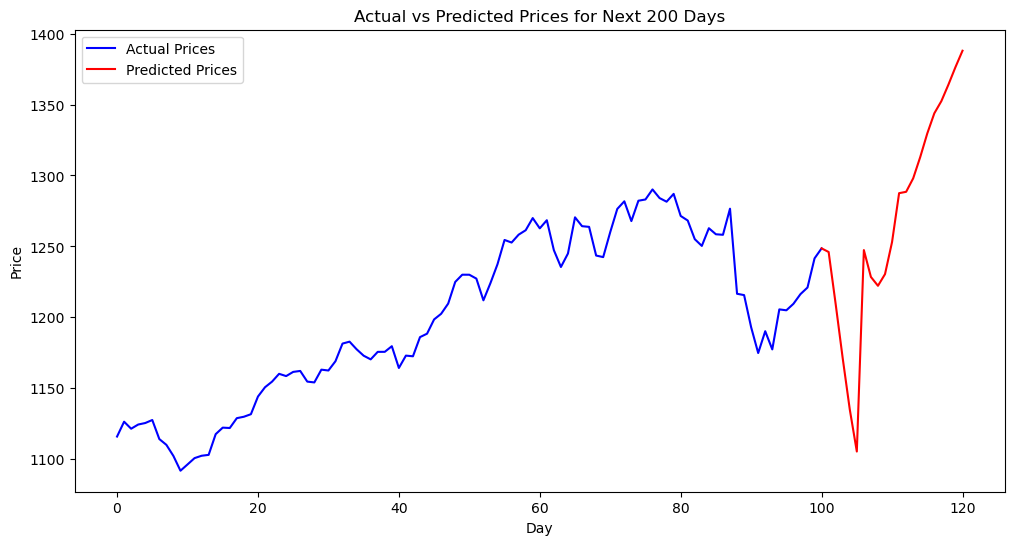

In [12]:
# Vẽ biểu đồ
from matplotlib import pyplot as plt
full = np.concatenate((y[-1:], predicted_values))

# predicted_values.insert(0, y[-1])
# predicted_values.pop()
plt.figure(figsize=(12, 6))
plt.plot(y[-101:], label="Actual Prices", color="blue")
plt.plot(
    np.arange(100, 101 + mun),
    full,
    label="Predicted Prices",
    color="red",
)
plt.title("Actual vs Predicted Prices for Next 200 Days")
plt.xlabel("Day")
plt.ylabel("Price")
plt.legend()
plt.show()